In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
# from quimb import *
import time


In [2]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    for i_1 in range(r**N):
        num_str=np.base_repr(i_1,base=r)[::-1]
        for i_2 in range(len(num_str)):
            states[i_1,i_2]=int(num_str[i_2])

    return states
# print( np.arange(int(r**(N-1)))  )
# print(states)

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


In [24]:
Nrep=10000
r=2 # local Hilbert space dim

Lab=6
Lc=4
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab

neg=np.zeros(Nrep)
v1b=np.zeros((Nrep*Nab,int(Lab/2)))

t_timer=time.time()
# np.random.seed(1)

for i_r in range(Nrep):
    print(i_r, end='\r')
    #### no symmetry
    X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

    mat=np.dot(X,np.matrix(X).H)
    rho= mat / np.trace(mat)
    
    for i_n in range(int(Lab/2)):
#     for i_n in range(4):
        Na=r**(i_n+1)
        Nb=r**(Lab-i_n-1)
        rT2b = p_transpose_2(rho,Na,Nb)
        l1T=np.linalg.eigvalsh(rT2b)
        v1b[i_r*Nab:(i_r+1)*Nab,i_n] = (Nab)*l1T

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Finished, elapsed time = 24.31 sec


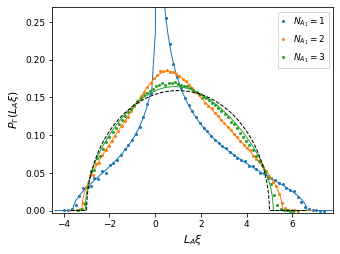

In [25]:
def Gz(z,a,b):
#     zsq=  2 - 18*z**2 - 9*z*a - 6*b - 9*z**2*b + 9*z*a*b + 6*b**2 - 2*b**3 + (4*(3*z*(-z + a) - (-1 + b)**2)**3 + (2 - 18*z**2 - 9*z*a - 6*b - 9*z**2*b + 9*z*a*b + 6*b**2 - 2*b**3)**2)**0.5 
#     ym= np.imag( -(-1 + b)/(3*z) + ((1 - 1j*sqrt(3))*(3*z*(-z + a) -(-1 + b)**2))/(3*2**(2/3)*z)/zsq**(1/3)  \
#             -(1 + 1j*sqrt(3))/(6*2**(1/3)*z)*zsq**(1/3) )

    a2= (b-1)/z +1j*0
    a1= (a-z)/z +1j*0
    a0= 1/z +1j*0
    Q= (3*a1-a2**2)/9 +1j*0
    R= (9*a2*a1-27*a0-2*a2**3)/54 +1j*0
    D= Q**3 + R**2 +1j*0
    S= (R+D**0.5 +1j*0)**(1/3)
    T= (R-D**0.5 +1j*0)**(1/3)
#     print(D**0.5)
#     z1= -a2/3 + (S+T)
#     z2= -a2/3 - (S+T)/2+ 1j*sqrt(3)*(S-T)/2
#     z3= -a2/3 - (S+T)/2- 1j*sqrt(3)*(S-T)/2
    z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
    return np.imag(z4) #,z2,z3

def Gz_eq(z_arr,a,b):
    ''' solves a cubic equation for G(z) numerically'''
    '''less efficient, but more reliable'''
    if isinstance(z_arr, list):
        z4=np.zeros(len(z_arr))
        for i_z in range(len(z_arr)):
            z= z_arr[i_z]
            z4[i_z]=np.imag(np.roots([z,b-1,a-z,1]))[1]
    else:
        z4=np.imag(np.roots([z_arr,b-1,a-z_arr,1]))[1]
    return np.abs(z4)


def semicirc_dist(Q,x,x0):
    # my Q is from Ludwig's paper
    R= 2*sqrt(Q)
    fx= 2/(pi*R**2)*(R**2-(x-x0)**2+0j)**0.5
    return fx

plt.figure(figsize=(4.8,3.6))
fsize=9
plt.rcParams.update({'font.size': fsize})

r=2
for i_n in range(int(Lab/2)):
# for i_n in range(0,4):
# for i_n in [0]:
    Na=r**(i_n+1)
    Nb=r**(Lab-i_n-1)

    num_bins = 70

    n, bin_edges = np.histogram(v1b[:,i_n], bins=num_bins)

    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    plt.plot(bins_center,n,'o',markersize=2,color='C%d' % (i_n),label=r'$N_{A_1}=%d$' % (i_n+1) )

#     xplot=np.linspace(-1,1)*1.5+1j*0
    a = Nc/Nb +1j*0
    b = Nc/Nb*Na +1j*0

    fx =  Nb/Nc
    fy =  Nc/pi/Nb
    xplot= np.linspace(bins_center.min(),bins_center.max(),2000)/fx*1.1 #+1j*1e-12
    yplot=np.abs(Gz(xplot,a,b))
    yplot_eq=Gz_eq(np.ndarray.tolist(xplot),a+1j*0,b+1j*0)
    if i_n==0:
        i1=677
        i2=701
        yplot[i2]=1.5
        inds=np.concatenate((np.arange(0,i1),np.arange(i2,len(xplot))))
        plt.plot(xplot[inds]*fx,fy*yplot[inds],linewidth=1,color='C%d' % (i_n))#,label=r'$N_{A_1}=%d$' % (i_n+1) )
#         plt.plot(xplot[:i1]*fx,fy*yplot[:i1],linewidth=1,color='C%d' % (i_n))
#         plt.plot(xplot[i2:]*fx,fy*yplot[i2:],linewidth=1,color='C%d' % (i_n))
#         plt.plot(xplot*fx,fy*yplot_eq,linewidth=1,color='C%d' % (i_n))
    else:
        plt.plot(xplot*fx,fy*yplot,linewidth=1,color='C%d' % (i_n))#, label=r'$N_{A_1}=%d$' % (i_n+1) )
plt.ylim(-0.003,0.27)
plt.legend(fontsize=fsize,handlelength=0.5)
plt.ylabel(r'$P_\Gamma(L_A \xi)$',fontsize = fsize+2)
plt.xlabel(r"$L_A \xi$",fontsize = fsize+2)
plt.xlim(-4.5,7.8)
    
fx_semi= semicirc_dist(Na*Nb/Nc,xplot*fx,1)
plt.plot(xplot*fx,np.real(fx_semi),'k--',linewidth=1)
plt.tight_layout()
plt.savefig('figs/NS_vs_LA1_LA_%d_LB_%d.pdf' % (Lab,Lc))
plt.show()
